# YOLO_v3 Custom Dataset (3 Classes)

* https://github.com/AlexeyAB/darknet#custom-object-detection 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. GPU & CUDA & cuDNN

>## 1) GPU Type

In [ ]:
!nvidia-smi 

Sun Apr  9 00:58:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    14W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

>## 2) CUDA Version

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


> ## 3) cuDNN Library Version

In [ ]:
!cat /usr/include/x86_64-linux-gnu/cudnn_v*.h | grep CUDNN_MAJOR -A 2

#define CUDNN_MAJOR 8
#define CUDNN_MINOR 7
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

/* cannot use constexpr here since this is a C-only file */


# II. Custom Data_Set

* 3 Classes

>##  1) wget From Github

* 'maskdataset_3C.tar' 파일 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.tara{a,b,c,d,e}

--2023-04-09 00:58:36--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.taraa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘maskdataset_3C.taraa’

maskdataset_3C.tara 100%[===================>]  90.00M   328MB/s    in 0.3s    

2023-04-09 00:58:43 (328 MB/s) - ‘maskdataset_3C.taraa’ saved [94371840/94371840]

--2023-04-09 00:58:43--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.tarab
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘maskdataset_3C.tarab’

maskdataset_3C.tara 100%[===================>]  90.00M   234MB/s    in 0.4s  

* 현재 작업 경로

In [ ]:
%pwd

'/content'

* 다운로드 결과 확인

In [ ]:
!ls -l 

total 408144
-rw-r--r-- 1 root root 94371840 Apr  9 00:58 maskdataset_3C.taraa
-rw-r--r-- 1 root root 94371840 Apr  9 00:58 maskdataset_3C.tarab
-rw-r--r-- 1 root root 94371840 Apr  9 00:58 maskdataset_3C.tarac
-rw-r--r-- 1 root root 94371840 Apr  9 00:59 maskdataset_3C.tarad
-rw-r--r-- 1 root root 40448000 Apr  9 00:59 maskdataset_3C.tarae
drwxr-xr-x 1 root root     4096 Apr  6 13:39 sample_data


>## 2) Unzip

In [ ]:
!cat maskdataset_3C.tar* | tar xf -

> ## 3) 결과 확인

In [ ]:
!ls -l '/content/yolo_custom_modeling'

total 12
-rw-r--r-- 1 root root 2523 Feb  1 15:06 creating-files-data-and-name.py
-rw-r--r-- 1 root root 3024 Feb  2 02:16 creating-train-and-test-txt-files.py
drwxr-xr-x 5 root root 4096 Feb  2 02:15 dataset


> ## 4) 'custom_data' & 'darknet' 설치경로 설정

In [ ]:
%cd /content/yolo_custom_modeling

/content/yolo_custom_modeling


# III. Train vs. Test Split

* 현재 작업 경로

In [ ]:
!pwd

/content/yolo_custom_modeling


>## 1) classes.txt 생성

In [ ]:
classes_text = """mask
w_mask
no_mask"""

with open("/content/yolo_custom_modeling/dataset/classes.txt", 'w') as file:
    file.write(classes_text)

* 생성 확인

In [ ]:
%cat /content/yolo_custom_modeling/dataset/classes.txt

mask
w_mask
no_mask

>## 2) Image & Label 리스트 지정

* 'images' & 'labels' 디렉토리 확인

In [ ]:
from glob import glob

img_list = glob('/content/yolo_custom_modeling/dataset/images/*.png')
txt_list = glob('/content/yolo_custom_modeling/dataset/labels/*.txt')

print('IMG_LIST : ', len(img_list))
print('TXT_LIST : ', len(txt_list))

IMG_LIST :  843
TXT_LIST :  843


* Label 파일을 'images' 디렉토리로 이동

 - 약 2분

In [ ]:
for a in txt_list:
  !mv {a} /content/yolo_custom_modeling/dataset/images

* 이동결과 확인

In [ ]:
img_list = glob('/content/yolo_custom_modeling/dataset/images/*.*')
txt_list = glob('/content/yolo_custom_modeling/dataset/labels/*.txt')

print('IMG_LIST : ', len(img_list))
print('TXT_LIST : ', len(txt_list))

IMG_LIST :  1686
TXT_LIST :  0


> ## 3) 'labelled_data.data' 파일 생성

* creating-files-data-and-name.py

In [ ]:
!python creating-files-data-and-name.py

* 생성 확인

In [ ]:
!ls -l /content/yolo_custom_modeling/dataset/labelled_data.data 

-rw-r--r-- 1 root root 107 Apr  9 01:00 /content/yolo_custom_modeling/dataset/labelled_data.data


> ## 4) Train & Test Data 목록 생성

* creating-train-and-test-txt-files.py
 - 7:3

In [ ]:
!python creating-train-and-test-txt-files.py

* 생성 확인

In [ ]:
!ls -l dataset/*.txt

-rw-r--r-- 1 root root    19 Apr  9 00:59 dataset/classes.txt
-rw-r--r-- 1 root root  8785 Apr  9 01:00 dataset/test.txt
-rw-r--r-- 1 root root 20610 Apr  9 01:00 dataset/train.txt


# IV. 'darknet' Setting

> ## 1) 'darknet' Clone

* 현재 작업 경로

In [ ]:
!pwd 

/content/yolo_custom_modeling


* darknet Clone

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git 

Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.16 MiB | 12.40 MiB/s, done.
Resolving deltas: 100% (10413/10413), done.


* Clone 확인

In [ ]:
%ls -l

total 16
-rw-r--r--  1 root root 2523 Feb  1 15:06 creating-files-data-and-name.py
-rw-r--r--  1 root root 3024 Feb  2 02:16 creating-train-and-test-txt-files.py
drwxr-xr-x 14 root root 4096 Apr  9 01:00 darknet/
drwxr-xr-x  5 root root 4096 Apr  9 01:00 dataset/


> ## 2) 'Makefile' Configuration

* darknet 디렉토리로 이동

In [ ]:
%cd darknet/

/content/yolo_custom_modeling/darknet


* Makefile 확인

In [ ]:
!ls -l Makefile

-rw-r--r-- 1 root root 5961 Apr  9 01:00 Makefile


* Makefile 수정

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

> ## 3) 'darknet' Installation

* Makefile 실행
 -  약 2분

In [ ]:
%%time

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (i

# V. 'darknet' Learning


* 현재 작업 경로

In [ ]:
!pwd

/content/yolo_custom_modeling/darknet


> ## 1) 실행권한 설정

* 실행권한 확인

In [ ]:
!ls -l darknet

-rwxr-xr-x 1 root root 6747168 Apr  9 01:02 darknet


* 실행권한 추가

In [ ]:
# !chmod +x darknet

* Configuration Check

In [ ]:
!./darknet detector

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


> ## 2) 실행환경 설정

* 현재 작업 경로

In [ ]:
!pwd 

/content/yolo_custom_modeling/darknet


* 작업 경로 변경

In [ ]:
%cd ..

/content/yolo_custom_modeling


* 'backup' 디렉토리 생성

In [ ]:
!mkdir backup

* 'backup' 디렉토리 생성 확인

In [ ]:
!ls -l

total 20
drwxr-xr-x  2 root root 4096 Apr  9 01:02 backup
-rw-r--r--  1 root root 2523 Feb  1 15:06 creating-files-data-and-name.py
-rw-r--r--  1 root root 3024 Feb  2 02:16 creating-train-and-test-txt-files.py
drwxr-xr-x 16 root root 4096 Apr  9 01:02 darknet
drwxr-xr-x  5 root root 4096 Apr  9 01:00 dataset


* labelled_data.data 파일 확인

In [ ]:
!ls -l dataset/labelled_data.data

-rw-r--r-- 1 root root 107 Apr  9 01:00 dataset/labelled_data.data


* yolov3-tiny-custom.cfg 파일 확인

In [ ]:
!ls -l dataset/yolov3-tiny-custom.cfg

-rw-r--r-- 1 root root 1988 Feb  1 15:06 dataset/yolov3-tiny-custom.cfg


> ## 3) 학습 실행

* 120분
 - 6000 epochs

In [ ]:
%%time

!darknet/darknet detector train dataset/labelled_data.data dataset/yolov3-tiny-custom.cfg -map -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.722404), count: 31, class_loss = 2.353117, iou_loss = 1.364868, total_loss = 3.717984 
 total_bbox = 1601594, rewritten_bbox = 0.598154 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.746061), count: 9, class_loss = 0.917940, iou_loss = 0.588082, total_loss = 1.506021 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.729364), count: 14, class_loss = 1.862087, iou_loss = 0.729192, total_loss = 2.591279 
 total_bbox = 1601617, rewritten_bbox = 0.598145 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.794147), count: 5, class_loss = 0.388151, iou_loss = 0.157867, total_loss = 0.546018 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.716022), count: 7, class_loss = 0.551339, iou_loss = 0.365481, total_loss = 0.916820 
 total_bbox = 1601

> ## 4) 모델 생성 확인


* Loss & mAP 

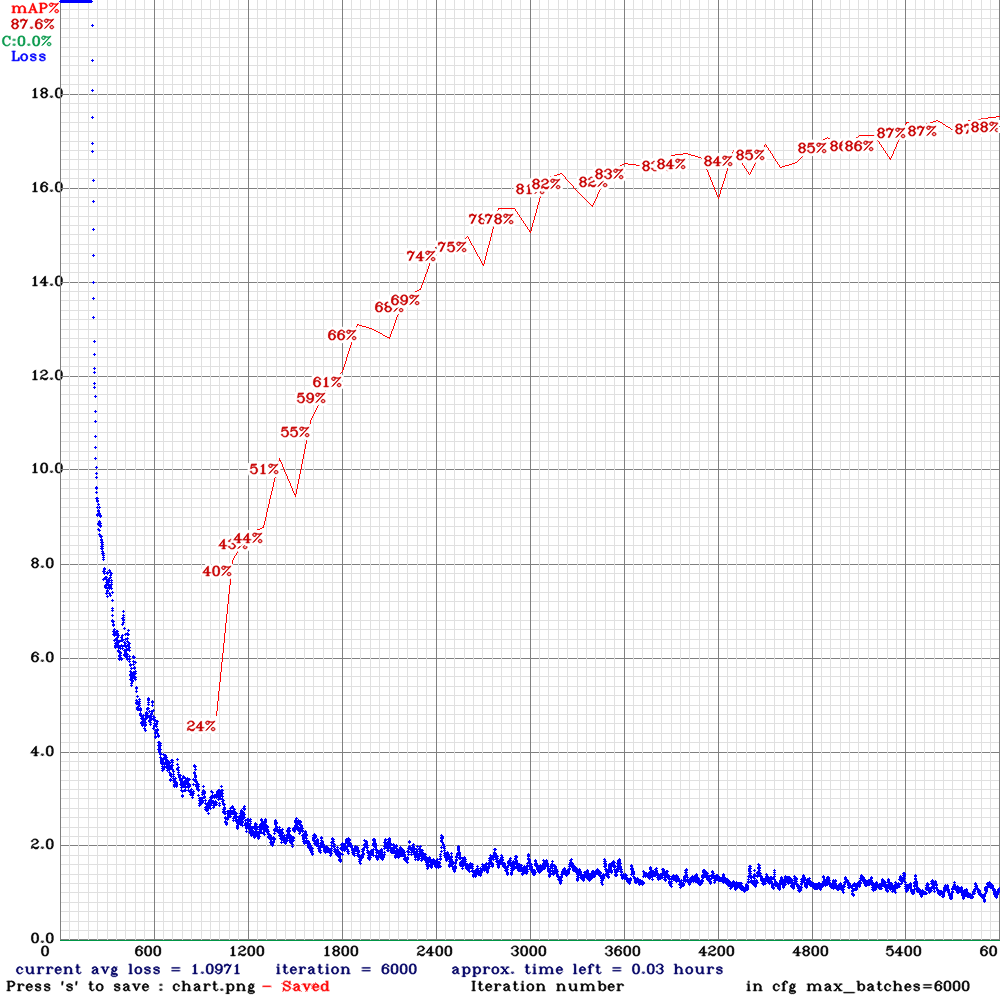

In [ ]:
from IPython.display import Image

Image('chart.png')

* 작업 경로 변경

In [ ]:
%cd darknet/

/content/yolo_custom_modeling/darknet


* yolov3-tiny-custom_final.weights 생성 확인

In [ ]:
!ls -l ../backup

total 305208
-rw-r--r-- 1 root root 34723476 Apr  9 01:21 yolov3-tiny-custom_1000.weights
-rw-r--r-- 1 root root 34723476 Apr  9 01:42 yolov3-tiny-custom_2000.weights
-rw-r--r-- 1 root root 34723476 Apr  9 02:02 yolov3-tiny-custom_3000.weights
-rw-r--r-- 1 root root 34723476 Apr  9 02:21 yolov3-tiny-custom_4000.weights
-rw-r--r-- 1 root root 34723476 Apr  9 02:41 yolov3-tiny-custom_5000.weights
-rw-r--r-- 1 root root 34723476 Apr  9 03:01 yolov3-tiny-custom_6000.weights
-rw-r--r-- 1 root root 34723476 Apr  9 03:01 yolov3-tiny-custom_best.weights
-rw-r--r-- 1 root root 34723476 Apr  9 03:01 yolov3-tiny-custom_final.weights
-rw-r--r-- 1 root root 34723476 Apr  9 03:01 yolov3-tiny-custom_last.weights


# VI. 학습결과 확인

> ## 1) 'coco.names' Update

* 아래 내용으로 수정 후 진행

 - no_mask
 - mask

In [ ]:
!cp -f /content/yolo_custom_modeling/dataset/classes.names /content/yolo_custom_modeling/darknet/data/coco.names

> ## 2) Object Detection 실행

In [ ]:
# -- mask_test는 1~10까지 임의로 변경하며 테스트 가능
# yolov3-tiny-custom.cfg 에서 Testing의 batch, subdivisions 주석 해제, Training에 주석 달기 
!./darknet detect ../dataset/yolov3-tiny-custom.cfg ../backup/yolov3-tiny-custom_last.weights ../dataset/test/mask_test_5.png

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128

> ## 3) Object Detection 결과 확인

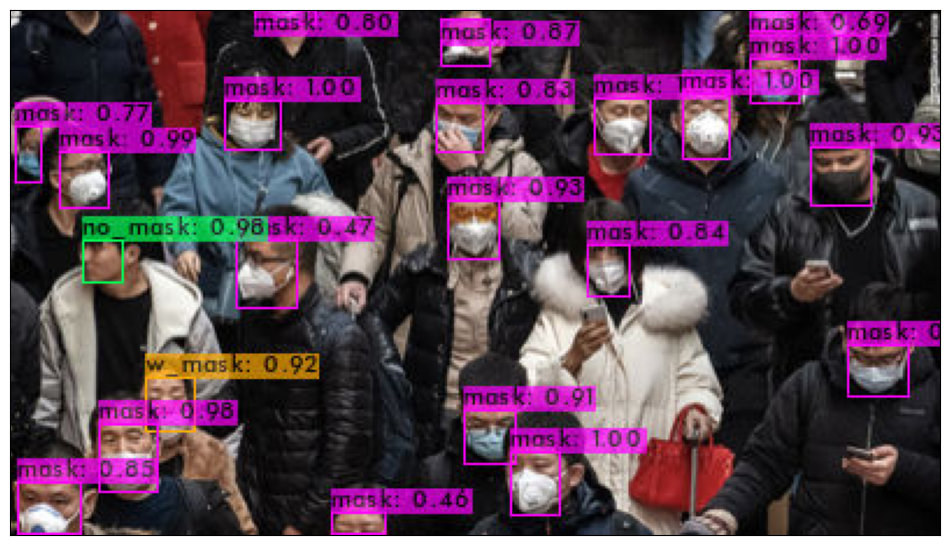

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

PIL_img = Image.open('predictions.jpg')

plt.figure(figsize = (12, 9))
plt.imshow(PIL_img)
plt.xticks([])
plt.yticks([])
plt.show()

# 
# 
# 
# The End
# 
# 
# 